In [40]:
import numpy as np
import math
from kapteyn import kmpfit
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
pre_x = np.array([12.65, 16.6, 17.75, 23.95, 28.75, 34.4, 39.45, 42.2, 43.65, 47.1])
x = np.cos(pre_x / 180 * math.pi) ** (-1)

pre_y = np.array([129467, 129275, 128377, 127292, 126692, 125321, 123980, 122215, 122085, 120669])
y = -2.5 * np.log10(pre_y)

pre_err = np.array([450, 449, 448, 447, 445, 443, 440, 438, 437, 434])
y_err = 2.5 / np.log(10) * pre_err / pre_y

In [10]:
def my_model(p, x):
    m0, K = p
    return(m0 + K * x)

def my_residuals(p, data):
    m0, K = p
    x, y, err = data
    return (y - my_model(p,x)) / err

In [12]:
fitobj = kmpfit.Fitter(residuals = my_residuals, data = (x, y, y_err))
p0 = [0, (y[-1] - y[0]) / (x[-1] - x[0])]
fitobj.fit(params0 = p0)

1

In [13]:
chi2_min = fitobj.chi2_min
reduced_chi2 = fitobj.rchi2_min
params = fitobj.params
asymptotic_error = fitobj.xerror
standard_errors = fitobj.stderr

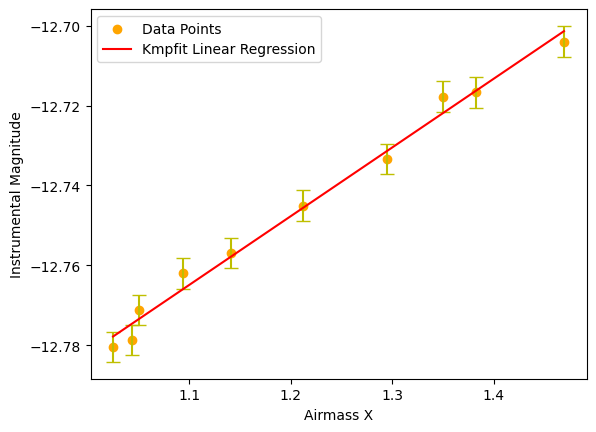

In [31]:
plt.close()
plt.errorbar(x, y, yerr = y_err, ls = 'none', capsize = 5, color = "y")
plt.scatter(x, y, color = "orange", label = "Data Points")
plt.plot(x, my_model(params, x), 'r', label = "Kmpfit Linear Regression")
plt.legend()
plt.xlabel("Airmass X")
plt.ylabel("Instrumental Magnitude")
plt.savefig("AAO_HW04_extinction_coff.jpg", bbox_inches ='tight')
plt.show()

In [54]:
with open("../dataset/detections.ASC", "r") as fh:
    detection = fh.readlines()
detection = detection[16:]

In [89]:
objects = []
for i in detection:
    info = list(filter(lambda x: x != "", i.replace("\n", "").split(" ")))
    feature = {}
    label = {"NUMBER": 1, "X_WORLD": 2, "Y_WORLD": 3, "X_IMAGE": 4, "Y_IMAGE": 5, "FLUX_APER": 6, "FLUXERR_APER": 12, "FLUX_AUTO": 18, "FLUXERR_AUTO": 19, "A_WORLD": 20, "B_WORLD": 21, "THETA_J2000": 22, "FLAGS": 23, "FWHM_WORLD": 24, "CLASS_STAR": 25, "FLUX_RADIUS": 26}
    for j in list(label.keys()):
        feature[j] = float(info[label[j] - 1])
    objects.append(feature)

In [91]:
for i in objects:
    i["SNR"] = i['FLUX_AUTO'] / i['FLUXERR_AUTO']
    SNR5 = list(filter(lambda x: x["SNR"] > 5, objects))

In [117]:
with open("../dataset/ds9.example.reg") as fh:
    example = fh.readlines()[:-2]

In [118]:
for i in SNR5:
    circle = "circle(" + str(round(i["X_WORLD"], 7)) + "," + str(round(i["Y_WORLD"], 7)) + ',1.500")\n'
    example.append(circle)

In [121]:
with open("../dataset/ds9.SNR5.reg", "w") as fh:
    fh.writelines(example)